In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) establish a seed, choose a random sample of 25 observations, calculate the sample's mean and maximum glucose readings, then compare the results using charts to the population statistics for the same variable.

In [4]:
# Establish a seed to ensure repeatability
np.random.seed(42)

# Choose 25 observations at random for your sample.
sample_data = data.sample(n=25)

In [5]:
# Determine the sample's mean and highest glucose readings.
mean_glucose = sample_data['Glucose'].mean()
highest_glucose = sample_data['Glucose'].max()

In [6]:
# Determine the highest and population mean glucose readings.
population_mean_glucose_data = data['Glucose'].mean()
population_highest_glucose_data = data['Glucose'].max()

In [8]:
# Show the figures
print("Sample Mean Glucose Data:", mean_glucose)
print("Sample Max Glucose Data:", highest_glucose)
print("\nPopulation Mean Glucose data:", population_mean_glucose_data)
print("Population Max Glucose data:", population_highest_glucose_data)

Sample Mean Glucose Data: 116.64
Sample Max Glucose Data: 183

Population Mean Glucose data: 120.89453125
Population Max Glucose data: 199


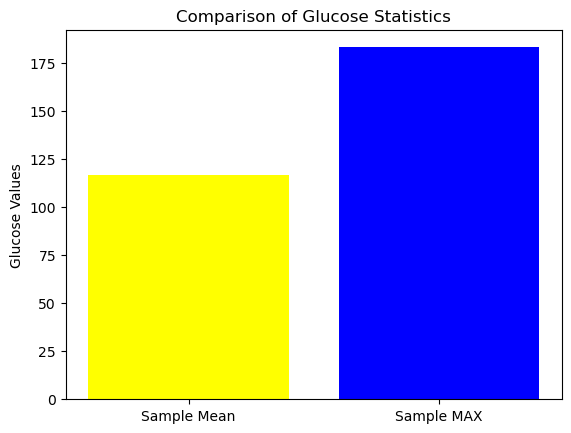

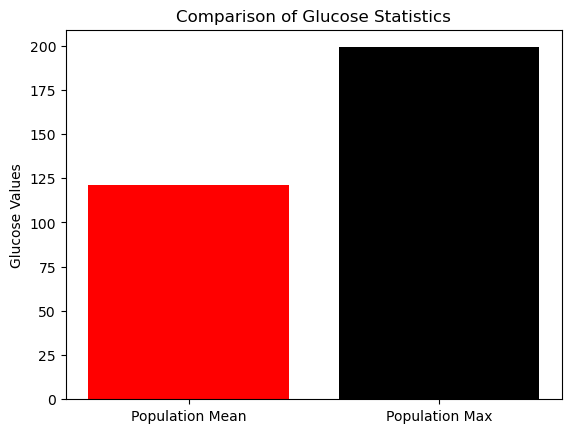

In [10]:
# Make a comparative bar chart.

labels = ['Sample Mean', 'Sample MAX']
values = [mean_glucose, highest_glucose]

plt.bar(labels, values, color=['Yellow', 'blue'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

# Make a comparative bar chart.
labels_1= ['Population Mean', 'Population Max']
values_1= [population_mean_glucose_data, population_highest_glucose_data]
plt.bar(labels_1, values_1, color=['red', 'black'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

b) Using charts, compared results of the samples' and the population's BMIs at the 98th percentile.


In [12]:
# Determine the sample's BMI's 98th percentile.
_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)

# Determine the population's 98th percentile for BMI.
_98th_percentile_bmi = np.percentile(data['BMI'], 98)

In [13]:
# Display the percentiles
print("Sample 98th Percentile BMI:", _98th_percentile_bmi)
print("Population 98th Percentile BMI:", _98th_percentile_bmi)

Sample 98th Percentile BMI: 47.52599999999996
Population 98th Percentile BMI: 47.52599999999996


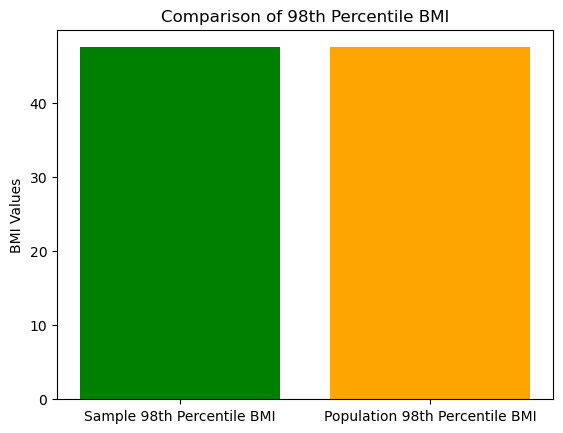

In [14]:
# Create a bar chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [_98th_percentile_bmi, _98th_percentile_bmi]

plt.bar(labels, values, color=['green', 'orange'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

c) Create 500 samples (each with 150 observations) from the population using bootstrap (replace= True). Determine the average, mean, standard deviation, and percentile for blood pressure. Compare these with the population statistics for the same variable. Compare all of these using charts.



In [16]:
# The quantity and dimensions of each bootstrap sample

num_samples_data = 500
sample_size_data = 150

In [17]:
# Create empty arrays at first to hold bootstrap data.
bootstrap_means = np.zeros(num_samples_data)
bootstrap_std_devs = np.zeros(num_samples_data)
bootstrap_percentiles = np.zeros(num_samples_data)

In [19]:
# Carry out bootstrap sampling

for i in range(num_samples_data):
   # Create a bootstrap sample by substituting
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size_data, replace=True)

   # Determine the bootstrap sample's mean, standard deviation, and 92th percentile.
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 92)

In [20]:
# Compute BloodPressure population statistics.
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_92_bp = np.percentile(data['BloodPressure'], 92)

In [21]:
# Show the demographic data
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 92th Percentile BloodPressure:", population_percentile_92_bp)

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 92th Percentile BloodPressure: 88.0


In [22]:
# Determine the bootstrap statistics' mean, standard deviation, and 92th percentile.
bootstrap_mean_mean = np.mean(bootstrap_means)
bootstrap_mean_std_dev = np.mean(bootstrap_std_devs)
bootstrap_mean_percentile_92 = np.mean(bootstrap_percentiles)

In [23]:
# Present the statistics from the bootstrap.
print("\nBootstrap Mean BloodPressure:", bootstrap_mean_mean)
print("Bootstrap Standard Deviation BloodPressure:", bootstrap_mean_std_dev)
print("Bootstrap 92th Percentile BloodPressure:", bootstrap_mean_percentile_92)


Bootstrap Mean BloodPressure: 69.17696
Bootstrap Standard Deviation BloodPressure: 19.01902467947537
Bootstrap 92th Percentile BloodPressure: 88.51728000000001


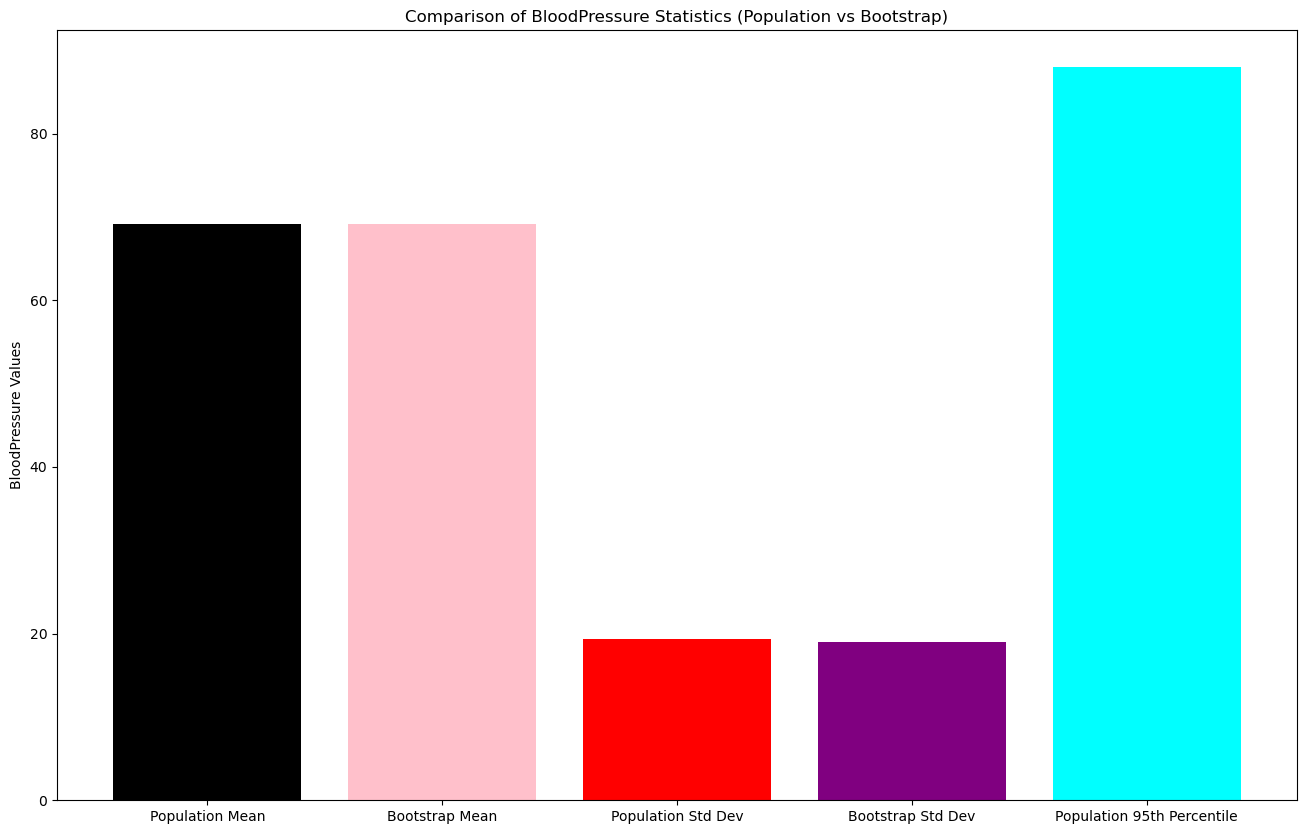

In [25]:
# Create a bar chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile']
values = [population_mean_bp, bootstrap_mean_mean, population_std_dev_bp, bootstrap_mean_std_dev, population_percentile_92_bp]

plt.bar(labels, values, color=['black', 'pink', 'red', 'purple', 'cyan'])
plt.title('Comparison of BloodPressure Statistics (Population vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()